# 데이터 불러오기

In [10]:
import pandas as pd
df =pd.read_csv('./weatherAUS.csv', parse_dates=['Date'])
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
pd.set_option('display.max_columns', None)

- DateThe — date of observation
- Location — The common name of the location of the weather station
- MinTemp — The minimum temperature in degrees celsius
- MaxTemp — The maximum temperature in degrees celsius
- Rainfall — The amount of rainfall recorded for the day in mm
- Evaporation — The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine — The number of hours of bright sunshine in the day.
- WindGustDir — The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed — The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am — Direction of the wind at 9am
- WindDir3pm — Direction of the wind at 3pm
- WindSpeed9am — Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm — Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am — Humidity (percent) at 9am
- Humidity3pm — Humidity (percent) at 3pm
- Pressure9am — Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm — Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am — Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear * sky whilst an 8 indicates that it is completely overcast.
- Cloud3pm — Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cload9am for a description of the values
- Temp9am — Temperature (degrees C) at 9am
- Temp3pm — Temperature (degrees C) at 3pm
- RainToday — Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RISK_MM — The amount of rain. A kind of measure of the "risk".
- RainTomorrow — The target variable. Did it rain tomorrow?

# 결측치확인 -> 제거

In [13]:
#결측치 확인
print(df.isnull().sum())

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Month                0
dtype: int64


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        143975 non-null  float64
 2   MaxTemp        144199 non-null  float64
 3   Rainfall       142199 non-null  float64
 4   Evaporation    82670 non-null   float64
 5   Sunshine       75625 non-null   float64
 6   WindGustDir    135134 non-null  object 
 7   WindGustSpeed  135197 non-null  float64
 8   WindDir9am     134894 non-null  object 
 9   WindDir3pm     141232 non-null  object 
 10  WindSpeed9am   143693 non-null  float64
 11  WindSpeed3pm   142398 non-null  float64
 12  Humidity9am    142806 non-null  float64
 13  Humidity3pm    140953 non-null  float64
 14  Pressure9am    130395 non-null  float64
 15  Pressure3pm    130432 non-null  float64
 16  Cloud9am       89572 non-null   float64
 17  Cloud3pm       86102 non-null

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000,145460.000000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339,6.399615
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665,3.427262
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000,3.000000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000,6.000000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000,9.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000,12.000000


In [16]:
# 결측률 확인
missing_total = df.isnull().sum().sort_values(ascending=False)
missing_rate = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_rate,], 
                         axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Sunshine,69835,48.009762
Evaporation,62790,43.166506
Cloud3pm,59358,40.807095
Cloud9am,55888,38.421559
Pressure9am,15065,10.356799
Pressure3pm,15028,10.331363
WindDir9am,10566,7.263853
WindGustDir,10326,7.098859
WindGustSpeed,10263,7.055548
Humidity3pm,4507,3.098446


## 결측률 심한 열은 아예 제거(evaporation, sunshine, Cloud9am ,Cloud3pm)

In [17]:
# evaporation, sunshine, Cloud9am ,Cloud3pm 은 결측치 비율이 너무 높아 사용할 수 없을 것으로 판단. 제거
# Cloud9pm, Cloud3pm, Evaporation, and Sunshine must be droped since significant amount of records in these columns is missed. Also we should exclude RISK_MM because it can leak the answers to the model and reduce its predictability.
droplist = list(missing_data[missing_data['Percent'] >15].index)
droplist
df = df.drop(droplist,axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,No,No,6


## 데이터 충분해 보이므로 결측치 있는 행 제거(dropna)

In [9]:
# 데이터가 충분히 많아 보이므로 nan값 있는거 다 빼주기
df = df.dropna()
df.isnull().any()

Location         False
MinTemp          False
MaxTemp          False
Rainfall         False
WindGustDir      False
WindGustSpeed    False
WindDir9am       False
WindDir3pm       False
WindSpeed9am     False
WindSpeed3pm     False
Humidity9am      False
Humidity3pm      False
Pressure9am      False
Pressure3pm      False
Temp9am          False
Temp3pm          False
RainToday        False
RainTomorrow     False
Month            False
dtype: bool

# 'Date'에서 월 정보만 뽑아내 'Month'로 저장. Date열 삭제

In [12]:
#날짜에서 '월' 정보만 뽑아내 사용

df['Month'] = df['Date'].dt.month
df.drop('Date', axis=1 ,inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No,6


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112925 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       112925 non-null  object 
 1   MinTemp        112925 non-null  float64
 2   MaxTemp        112925 non-null  float64
 3   Rainfall       112925 non-null  float64
 4   WindGustDir    112925 non-null  object 
 5   WindGustSpeed  112925 non-null  float64
 6   WindDir9am     112925 non-null  object 
 7   WindDir3pm     112925 non-null  object 
 8   WindSpeed9am   112925 non-null  float64
 9   WindSpeed3pm   112925 non-null  float64
 10  Humidity9am    112925 non-null  float64
 11  Humidity3pm    112925 non-null  float64
 12  Pressure9am    112925 non-null  float64
 13  Pressure3pm    112925 non-null  float64
 14  Temp9am        112925 non-null  float64
 15  Temp3pm        112925 non-null  float64
 16  RainToday      112925 non-null  object 
 17  RainTomorrow   112925 non-nul

# 수치형과 문자형 변수 나누기.
### year와 month는 수치형으로 나와있지만 문자형 특성에 가까우므로 문자형으로 분류

In [11]:
#수치형과 문자형 변수 나누기.
#year와 month는 수치형으로 나와있지만 문자형 특성에 가까우므로 문자형으로 분류
df_numeric = list(df.select_dtypes(['float64']).columns)
df_object = list(df.select_dtypes(['object','int64']).columns)
print(df_numeric)
print('\n')
print(df_object)

['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow', 'Month']


# 비 여부 가변수화

In [12]:
# 비 여부 가변수화
df['RainTomorrow'] = df['RainTomorrow'].apply(lambda x: 1 if(x=='Yes') else 0)
df['RainToday'] = df['RainToday'].apply(lambda x: 1 if(x=='Yes') else 0)

# target변수가 불균형 -> 추후 조정

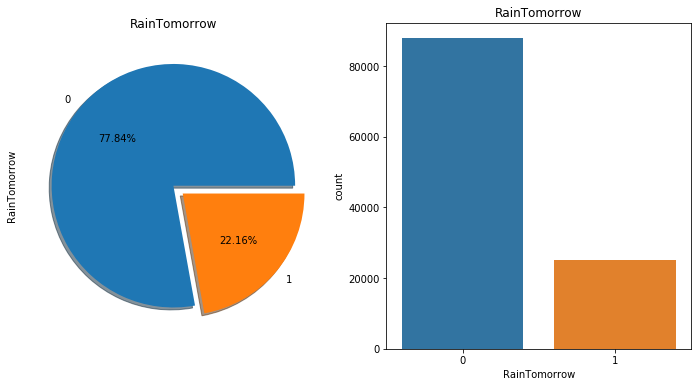

In [13]:
# target변수가 불균형 -> 추후 조정
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,2,figsize=(12,6))
df['RainTomorrow'].value_counts().plot.pie(autopct="%1.2f%%", explode=[0,0.1],ax=ax[0],shadow=True)
ax[0].set_title('RainTomorrow')
sns.countplot('RainTomorrow',data=df,ax=ax[1])
ax[1].set_title('RainTomorrow')
plt.show()
                                            

# 변수간 상관계수 확인
- #minTemp,maxTemp,Temp3pm,Temp9pm이 높은 상관관계. 그러나 각각 기여하는 바가 다르다고 생각되어 제거하지는 않았음,,

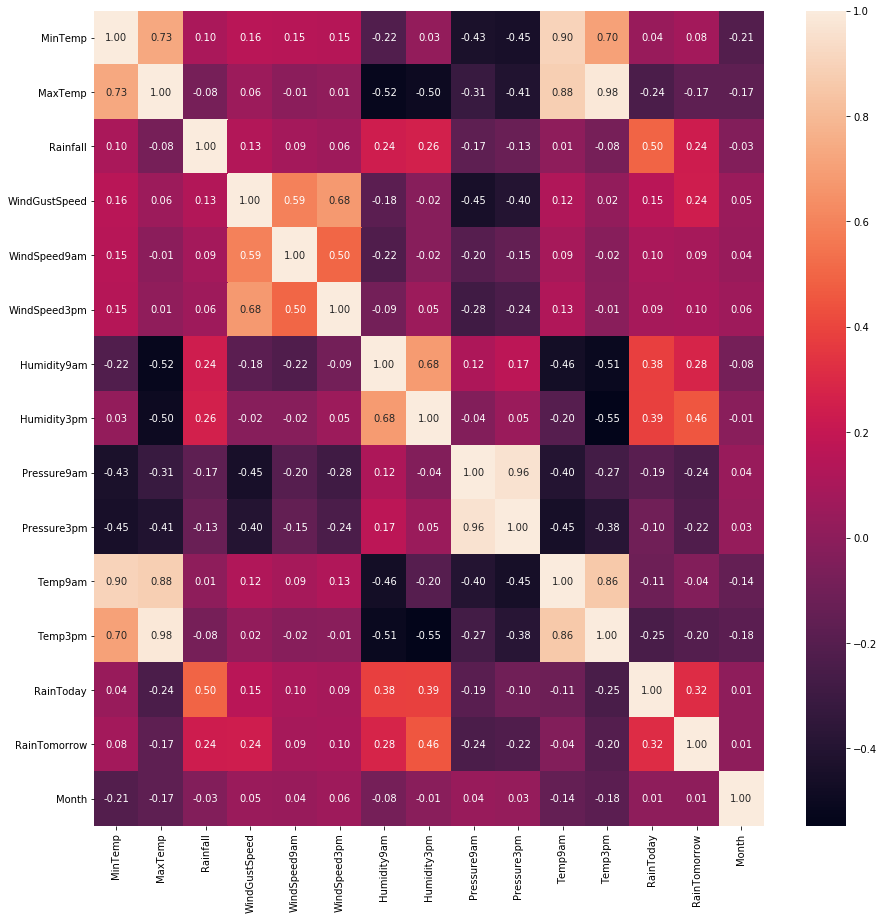

In [14]:
corr = df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(data=corr,annot=True,fmt='.2f')
plt.show()

#minTemp,maxTemp,Temp3pm,Temp9pm이 높은 상관관계. 그러나 각각 기여하는 바가 다르다고 생각되어 제거하지는 않았음,,

# object 변수['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

## Location

In [15]:
df['Location']

0         Albury
1         Albury
2         Albury
3         Albury
4         Albury
           ...  
145454     Uluru
145455     Uluru
145456     Uluru
145457     Uluru
145458     Uluru
Name: Location, Length: 112925, dtype: object

In [16]:
df['Location'].nunique()

44

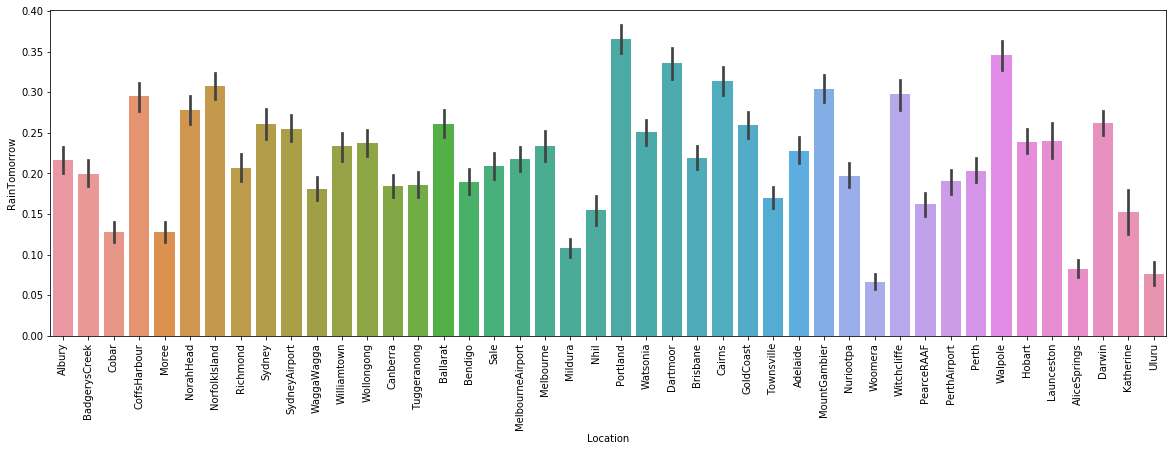

In [17]:
# Location
# 도시별 강수
plt.figure(figsize=(20,6))
sns.barplot(x='Location',y='RainTomorrow',data=df)
plt.xticks(size=10,rotation='vertical')
plt.show()

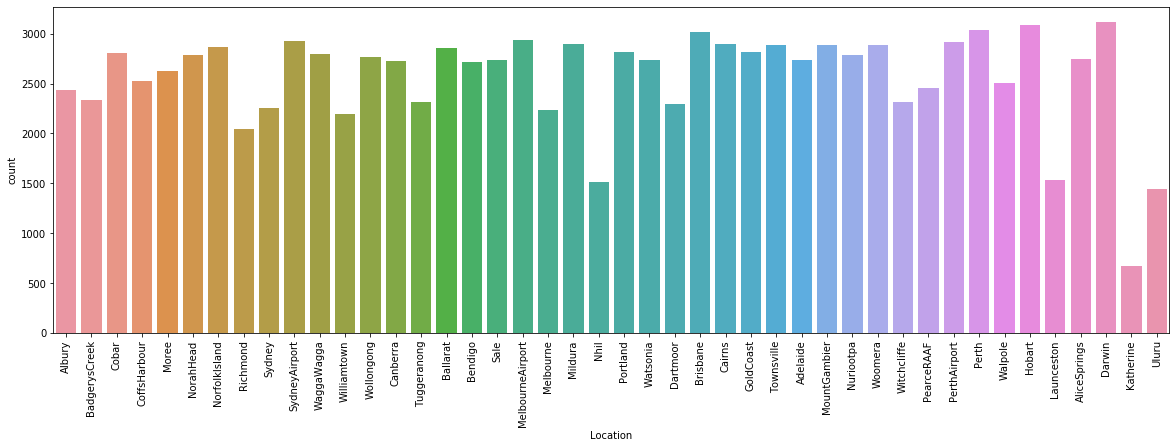

In [18]:
plt.figure(figsize=(20,6))
sns.countplot(x='Location',data=df)
plt.xticks(size=10,rotation='vertical')
plt.show()

In [19]:
# 지역별 비 올 확률 빈도에 대한 비율로 나타냄
loca =pd.read_csv('C:/python/loca.csv')
import folium

m = folium.Map([-30,135],zoom_start=4)

for i in range(0,len(loca)):
    latitude = loca.iloc[i]['Latitude']
    longitude = loca.iloc[i]['Longitude']
    location=(latitude, longitude)
    folium.CircleMarker(location, radius=loca.iloc[i]['RainTomorrow']/loca.iloc[i]['Count']*60,
                        color='#3186cc',fill_color='#3186cc', popup=loca.iloc[i]['Location']).add_to(m)

m

FileNotFoundError: [Errno 2] File C:/python/loca.csv does not exist: 'C:/python/loca.csv'

## WindGustDir

In [20]:
df['WindGustDir']

0           W
1         WNW
2         WSW
3          NE
4           W
         ... 
145454      E
145455      E
145456    NNW
145457      N
145458     SE
Name: WindGustDir, Length: 112925, dtype: object

In [21]:
df['WindGustDir'].nunique()

16

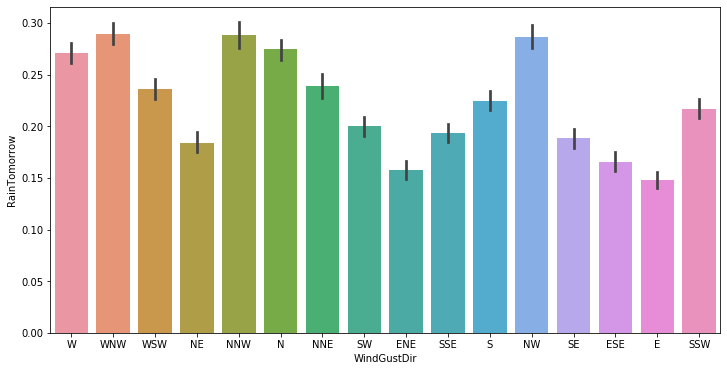

In [22]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindGustDir',y='RainTomorrow',data=df)

In [23]:
df.groupby('WindGustDir')['RainTomorrow'].mean()

WindGustDir
E      0.147926
ENE    0.157420
ESE    0.165515
N      0.274515
NE     0.184206
NNE    0.238980
NNW    0.288307
NW     0.286384
S      0.224249
SE     0.188327
SSE    0.193323
SSW    0.216832
SW     0.199736
W      0.271002
WNW    0.289528
WSW    0.236204
Name: RainTomorrow, dtype: float64

## WindDir9am

In [24]:
df['WindDir9am']

0           W
1         NNW
2           W
3          SE
4         ENE
         ... 
145454    ESE
145455     SE
145456     SE
145457     SE
145458    SSE
Name: WindDir9am, Length: 112925, dtype: object

In [25]:
df['WindDir9am'].nunique()

16

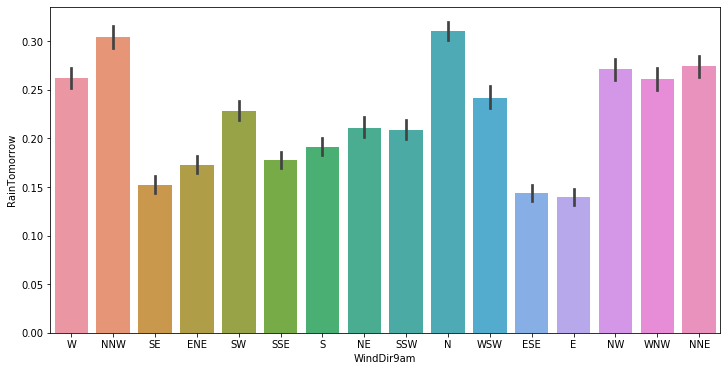

In [26]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindDir9am',y='RainTomorrow',data=df)

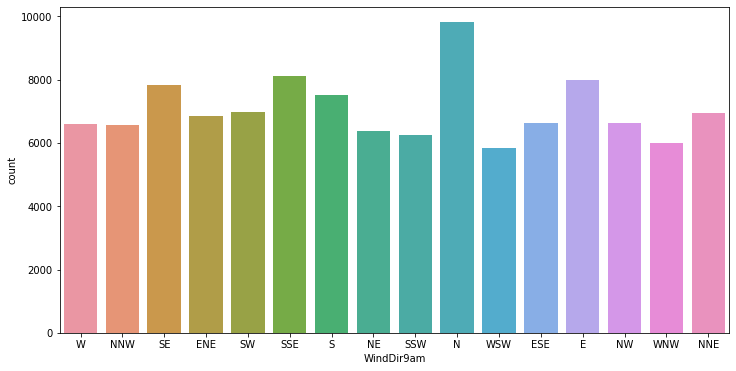

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x='WindDir9am',data=df)
#n 방향은 그 빈도 자체도 많고 이로인해 다음날 비가 올 확률도 높다.
# se,e방향같은경우 그 빈도가 적지 않음에도 다음날 비가 올 확률이 낮다,,(e계통은 빈도에 비해 다음날 비올확률 낮음)
# nw계통은 비올 확률이 높아지는 경향...?

In [28]:
df.groupby('WindDir9am')['RainTomorrow'].mean()

WindDir9am
E      0.139474
ENE    0.172499
ESE    0.144000
N      0.310647
NE     0.211029
NNE    0.274140
NNW    0.303784
NW     0.271092
S      0.191059
SE     0.152224
SSE    0.178035
SSW    0.209072
SW     0.228113
W      0.261804
WNW    0.261276
WSW    0.242010
Name: RainTomorrow, dtype: float64

## WindDir3pm

In [29]:
df['WindDir3pm']

0         WNW
1         WSW
2         WSW
3           E
4          NW
         ... 
145454      E
145455    ENE
145456      N
145457    WNW
145458      N
Name: WindDir3pm, Length: 112925, dtype: object

In [30]:
df['WindDir3pm'].nunique()

16

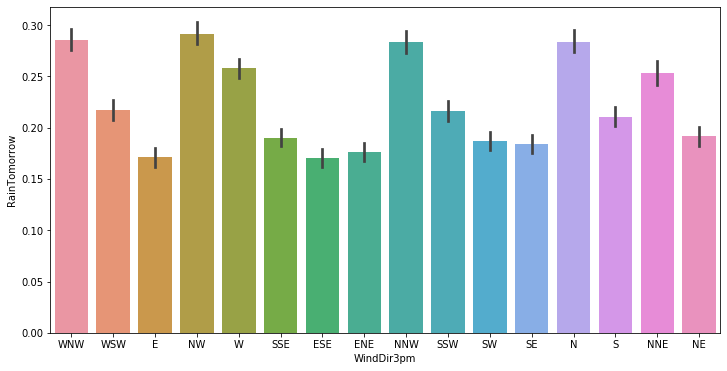

In [31]:
plt.figure(figsize=(12,6))
sns.barplot(x='WindDir3pm',y='RainTomorrow',data=df)

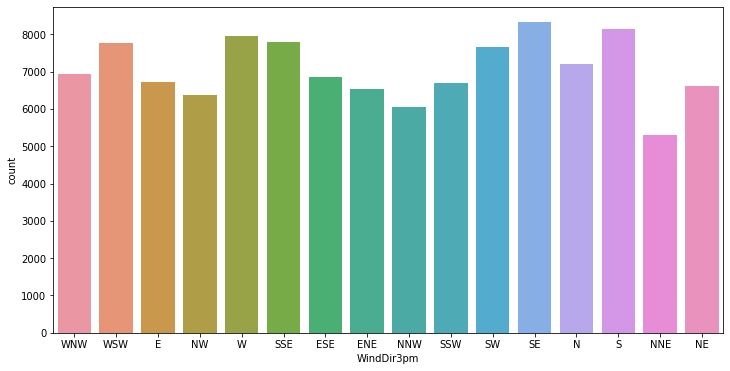

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='WindDir3pm',data=df)

## Month

In [34]:
df['Month']

0         12
1         12
2         12
3         12
4         12
          ..
145454     6
145455     6
145456     6
145457     6
145458     6
Name: Month, Length: 112925, dtype: int64

In [35]:
df['Month'].nunique()

12

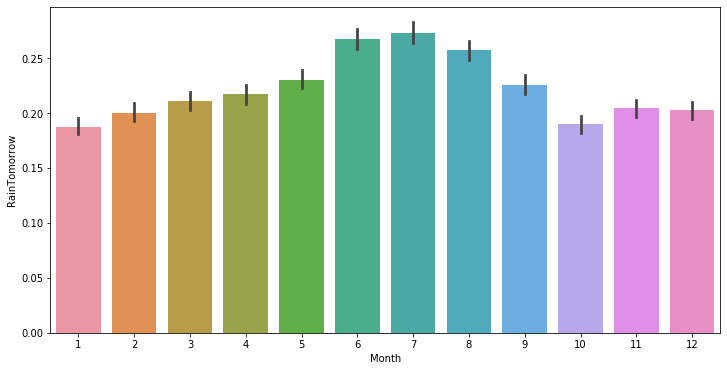

In [36]:
plt.figure(figsize=(12,6))

sns.barplot(x='Month',y='RainTomorrow',data=df)

#6,7,8월등 여름에 강수확률 증가

# onehotencoding

In [33]:
def add_column_prefixes(data, column, prefix):
    return data[column].apply(lambda x: prefix + str(x))
df['WindDir9am'] = add_column_prefixes(df, 'WindDir9am', '9_')
df['WindDir3pm'] = add_column_prefixes(df, 'WindDir3pm', '3_')

#winddir 3pm / 9pm이 모두 같은 것을 갖고있기 때문에 원핫 인코딩 진행 전 prefix 추가

In [37]:
df_object = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','Month']
for col in df_object:
    d = pd.get_dummies(df[col],drop_first=True)
    df.drop(col,axis=1,inplace=True)
    df = pd.concat((df,d),axis=1)

df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,CoffsHarbour,Dartmoor,Darwin,GoldCoast,Hobart,Katherine,Launceston,Melbourne,MelbourneAirport,Mildura,Moree,MountGambier,Nhil,NorahHead,NorfolkIsland,Nuriootpa,PearceRAAF,Perth,PerthAirport,Portland,Richmond,Sale,Sydney,SydneyAirport,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,9_ENE,9_ESE,9_N,9_NE,9_NNE,9_NNW,9_NW,9_S,9_SE,9_SSE,9_SSW,9_SW,9_W,9_WNW,9_WSW,3_ENE,3_ESE,3_N,3_NE,3_NNE,3_NNW,3_NW,3_S,3_SE,3_SSE,3_SSW,3_SW,3_W,3_WNW,3_WSW,2,3,4,5,6,7,8,9,10,11,12
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


## RainToday

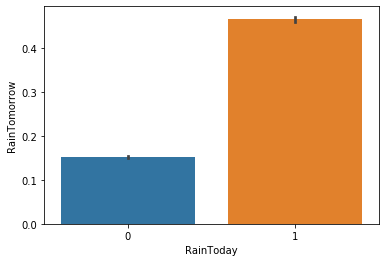

In [40]:
#내일 비가 올 확률은 오늘 비가 왔을  경우 더 높음
sns.barplot(x='RainToday',y='RainTomorrow',data=df)

# 수치형 데이터 

## 2. 왜도 조정

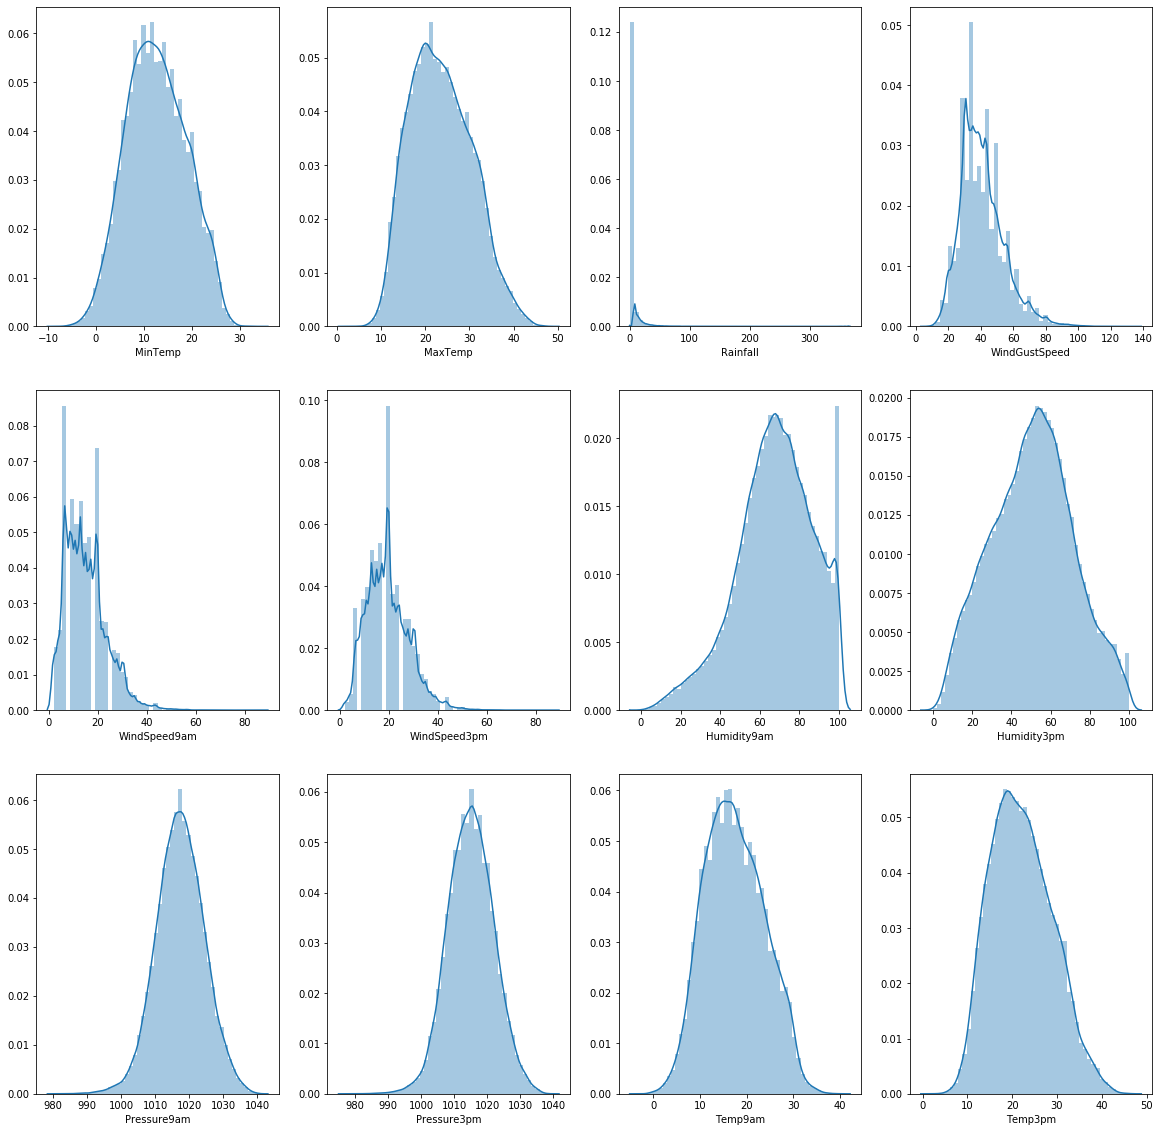

In [41]:
def dist_numeric(df,columns):
    count = 0
    fig, ax =plt.subplots(nrows=3,ncols=4, figsize=(20,20))
    for i in range(3):
        for j in range(4):
            sns.distplot(df[columns[count]],ax=ax[i][j])
            count = count+1

dist_numeric(df,df_numeric)

In [42]:
for col in df_numeric:
    Skew = "{:<10}\t Skewness: {:.4f}".format(col, df[col].skew())
    print(Skew)

# RainFall, WindSpeed9am, WindSpeed3pm의 왜도가 높다.

MinTemp   	 Skewness: 0.0739
MaxTemp   	 Skewness: 0.3027
Rainfall  	 Skewness: 9.6502
WindGustSpeed	 Skewness: 0.9158
WindSpeed9am	 Skewness: 0.9183
WindSpeed3pm	 Skewness: 0.6804
Humidity9am	 Skewness: -0.4649
Humidity3pm	 Skewness: 0.0211
Pressure9am	 Skewness: -0.1055
Pressure3pm	 Skewness: -0.0533
Temp9am   	 Skewness: 0.1702
Temp3pm   	 Skewness: 0.3226


In [43]:
import numpy as np
df['Rainfall'] = df['Rainfall']**(1/5)
df['WindSpeed9am'] = np.log1p(df['WindSpeed9am'])
df['WindSpeed3pm'] = np.log1p(df['WindSpeed3pm'])

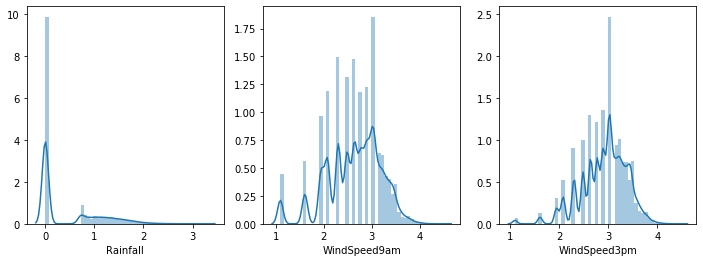

In [44]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.distplot(df['Rainfall'])
plt.subplot(132)
sns.distplot(df['WindSpeed9am'])
plt.subplot(133)
sns.distplot(df['WindSpeed3pm'])

In [45]:
for col in df_numeric:
    Skew = "{:<10}\t Skewness: {:.4f}".format(col, df[col].skew())
    print(Skew)
    
#왜도 어느정도 조정됨.

MinTemp   	 Skewness: 0.0739
MaxTemp   	 Skewness: 0.3027
Rainfall  	 Skewness: 1.0720
WindGustSpeed	 Skewness: 0.9158
WindSpeed9am	 Skewness: -0.5425
WindSpeed3pm	 Skewness: -0.6538
Humidity9am	 Skewness: -0.4649
Humidity3pm	 Skewness: 0.0211
Pressure9am	 Skewness: -0.1055
Pressure3pm	 Skewness: -0.0533
Temp9am   	 Skewness: 0.1702
Temp3pm   	 Skewness: 0.3226


# 모델 적용(resample)

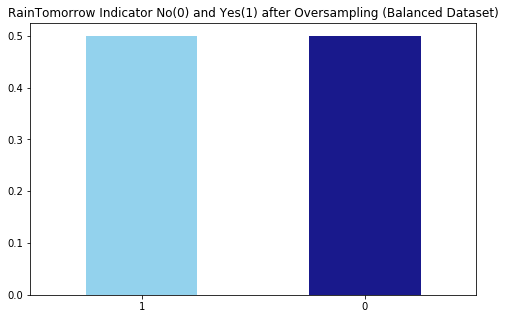

In [46]:
from sklearn.utils import resample

no = df[df.RainTomorrow == 0]
yes = df[df.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

df = oversampled

In [47]:
data = df.drop(['RainTomorrow'],axis=1)
label = df['RainTomorrow']

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve,roc_curve
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=12)

In [49]:
# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(X_train)
x_test = scaler.fit_transform(X_test)

In [50]:
def get_clf_eval(y_test,pred=None,pred_proba=None):
    confusion = confusion_matrix(y_test,pred)
    accuracy = accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f}, AUC:{4:.4f}'
         .format(accuracy,precision,recall,f1,roc_auc))

## logistic

In [51]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred_lr = lr.predict(x_test)
pred_proba_lr=lr.predict_proba(x_test)[:,1]
get_clf_eval(y_test,pred_lr,pred_proba_lr)

오차 행렬
[[17732  4271]
 [ 4772 17178]]
정확도:0.7943, 정밀도:0.8009, 재현율:0.7826, F1:0.7916, AUC:0.8783


## randomforest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
pred_rf = rf.predict(x_test)
pred_proba_rf=rf.predict_proba(x_test)[:,1]
get_clf_eval(y_test,pred_rf,pred_proba_rf)

KeyboardInterrupt: 

## xgboost

In [ ]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier()
evals = [(x_test,y_test)]

xgb_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_set=evals,verbose=True)

pred_xgb = xgb_wrapper.predict(x_test)
pred_proba_xgb=xgb_wrapper.predict_proba(x_test)[:,1]
get_clf_eval(y_test,pred_xgb,pred_proba_xgb)

## lgbm

In [ ]:
from lightgbm import LGBMClassifier

lgbm_wrapper = LGBMClassifier()

evals = [(x_test,y_test)]

lgbm_wrapper.fit(x_train,y_train,early_stopping_rounds=100,eval_set=evals,verbose=True)
pred_lgbm = lgbm_wrapper.predict(x_test)
pred_proba_lgbm=lgbm_wrapper.predict_proba(x_test)[:,1]
get_clf_eval(y_test,pred_lgbm,pred_proba_lgbm)